In [98]:
import torch
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import torch.optim as optim
import torch
import torch.nn as nn

In [99]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
(1797, 64)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

(1797, 64)


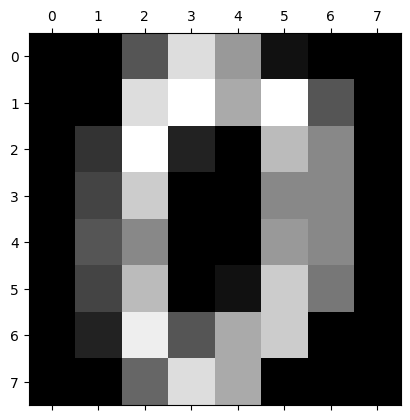

In [100]:
plt.matshow(digits.images[0], cmap="gray")
plt.show()

In [101]:
digits.data.max()

np.float64(16.0)

In [102]:
x=digits.data/16
y=digits.target

In [103]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

In [104]:
x_train, x_test, y_train, y_test=sk.model_selection.train_test_split(x, y, test_size=0.2,random_state=42)

In [105]:
model= SVC(gamma=2, C=1, random_state=42)

In [106]:
model.fit(x_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,2
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [107]:
y_predictions=model.predict(x_test)

In [108]:
predictions = model.predict(x_test)

In [109]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        33
           1       1.00      0.89      0.94        28
           2       1.00      0.85      0.92        33
           3       1.00      0.79      0.89        34
           4       1.00      0.93      0.97        46
           5       1.00      0.94      0.97        47
           6       1.00      0.89      0.94        35
           7       1.00      0.91      0.95        34
           8       0.40      1.00      0.57        30
           9       1.00      0.88      0.93        40

    accuracy                           0.88       360
   macro avg       0.94      0.87      0.89       360
weighted avg       0.95      0.88      0.89       360



In [110]:
i=7
image=x_test[i].reshape(8,8)

In [111]:
image.shape

(8, 8)

In [112]:
p=model.predict(x_test[i].reshape(1,64))

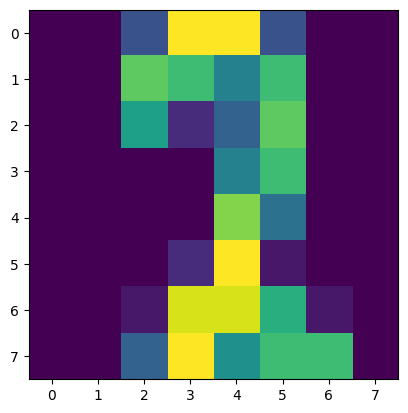

In [113]:
plt.imshow(image)

In [114]:
p

array([2])

### Train

In [193]:
torch.manual_seed(10)

In [194]:
device="cpu"

In [195]:
X_train=torch.tensor(x_train, dtype=torch.float32)
X_test=torch.tensor(x_test,dtype=torch.float32)
Y_train=torch.tensor(y_train)
Y_test=torch.tensor(y_test)

In [196]:
model=nn.Sequential(
    nn.Linear(64,10),
)

In [197]:
cryterial=nn.CrossEntropyLoss()

In [198]:
optimizer=optim.Adam(model.parameters(),lr=0.1)

In [211]:
epohs=10
B_s=64
for epoh in range(1,epohs+1):
    model.train()
    X_train=X_train[torch.randperm(X_train.shape[0])]
    
for start in range(0, len(x_train), B_s):
    x_b = x_train[start:start+B_s]
    y_b = y_train[start:start+B_s]

    x_b = torch.tensor(x_b, dtype=torch.float32)
    y_b = torch.tensor(y_b, dtype=torch.long)

    optimizer.zero_grad()
    preds = model(x_b)
    loss = cryterial(preds, y_b)
    loss.backward()
    optimizer.step()


In [212]:
x_train.shape[0]

1437

In [213]:
model.eval()

Sequential(
  (0): Linear(in_features=64, out_features=10, bias=True)
)

In [214]:
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

In [215]:
with torch.no_grad():
    preds = model(x_test_tensor)

In [216]:
preds

tensor([[-1.0324, -1.7368, -3.6813,  ..., -4.2783,  0.7165, -1.8125],
        [ 0.2919, -3.8137, -3.0471,  ..., -1.6709,  0.3907,  3.8518],
        [-4.9701, -2.8295,  0.3762,  ..., -2.5488,  2.4511,  1.2378],
        ...,
        [-0.5904, -2.2142,  0.0090,  ...,  1.5416,  2.9048, -0.5888],
        [-0.8125, -4.7929,  1.0956,  ..., -5.0808,  0.4669,  0.9682],
        [-0.1609, -5.0846, -2.6380,  ..., -4.7616, -0.1466,  2.9577]])

In [217]:
preds.argmax(axis=1)

tensor([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 8, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3, 9, 7,
        5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0,
        6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5, 7, 0, 7, 5, 9, 9,
        5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2, 8, 3, 5, 2,
        9, 0, 4, 4, 4, 3, 5, 3, 1, 8, 5, 1, 4, 2, 7, 7, 4, 4, 1, 9, 2, 7, 8, 7,
        2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5, 7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6,
        8, 9, 6, 9, 0, 5, 5, 6, 6, 0, 6, 4, 2, 9, 3, 8, 7, 2, 9, 0, 0, 5, 8, 6,
        5, 7, 9, 8, 4, 2, 1, 3, 7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4,
        1, 5, 4, 2, 3, 6, 4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 8, 8,
        6, 0, 4, 5, 2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5,
        8, 5, 5, 1, 0, 1, 8, 8, 1, 8, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 8, 7,
        7, 0, 1, 0, 4, 5, 8, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5, 5, 9,
        9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4,

In [218]:
confusion_matrix(y_test, preds.argmax(axis=1))

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  1,  0,  0,  0,  0,  0,  3,  1],
       [ 0,  1, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 30,  0,  1,  0,  0,  2,  0],
       [ 1,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  2],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1,  5, 32]])

In [219]:
torch.randperm(x_train.shape[0])

tensor([ 949,  389,  287,  ...,   52, 1074,  603])

In [220]:
x_train[torch.randperm(x_train.shape[0])]

array([[0.    , 0.    , 0.3125, ..., 1.    , 0.1875, 0.    ],
       [0.    , 0.0625, 0.875 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.875 , 0.0625, 0.    ],
       ...,
       [0.    , 0.    , 0.3125, ..., 0.875 , 0.3125, 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.4375, 0.    ],
       [0.    , 0.    , 0.6875, ..., 1.    , 1.    , 0.75  ]],
      shape=(1437, 64))

In [221]:
x_train

array([[0.    , 0.    , 0.1875, ..., 0.8125, 0.25  , 0.    ],
       [0.    , 0.    , 0.5625, ..., 0.1875, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.5625, ..., 1.    , 0.125 , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ]],
      shape=(1437, 64))

In [222]:
print (classification_report(y_test, preds.argmax(axis=1) ))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       0.88      0.82      0.85        28
           2       0.94      0.97      0.96        33
           3       1.00      0.88      0.94        34
           4       1.00      0.98      0.99        46
           5       0.96      0.94      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.74      0.97      0.84        30
           9       0.89      0.80      0.84        40

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360

